# Part 1 - Straight mapping
Again, there are some obvious functions I'm going to need. I'll write these first, and then go on to the parsing and calling. I'll need to generate a map to keep track of the seafloor state, as well as a function to flesh out a line between it's start and end points. Finally, I'll need a function to update the seafloor state with a list of points.

In [1]:
def generate_orthogonal_line(start, end):
    """
    Takes line start and end points and returns a list of coordinates for all points on the line. Ignores non-orthogonal lines.
    
    Parameters:
        start [int x, int y]: The x and y location of the line start
        end [int x, int y]: The x and y location of the line end
        
    Returns: 
        points [[int x, int y], ...]: Returns a list of points the line crosses as 2 element x, y lists.
        returns None if the line is non orthogonal
    """
    
    #start by filtering for orthogonal lines, and returning if the line is non-orthongonal
    if start[0] != end[0] and start[1] != end[1]:
        return None
    
    points = []
    
    #start with vertical lines where x1 = x2
    if start[0] == end[0]:
        if start[1] > end[1]:
            for point in range(end[1], start[1]+1):
                points.append([start[0], point])
        if start[1] < end[1]:
            for point in range(start[1], end[1]+1):
                points.append([start[0], point])
        # not sure if this is needed, but if the start and end points are identical, just return that point
        if start[1] == end[1]:
            points.append[start[0], start[1]]
            
    #deal with horizontal lines where y1 = y2, no need to deal with identical points again
    if start[0] > end[0]:
        for point in range(end[0], start[0]+1):
            points.append([point, start[1]])
    if start[0] < end[0]:
        for point in range(start[0], end[0]+1):
            points.append([point, start[1]])
            
    return points


def create_map(points):
    """
    Takes a list of points, finds the maximum extents, and returns a 2d map filled with zeros
    
    Parameters:
        points [[int x, int y], ...]: Takes a list of points as 2 element x, y lists.
        
    Returns: 
        map [[0,0,0,0...], ...]: Returns a 2d map of zeros large enough to contain all the points passed in.
    """
    
    # This max(max( is ugly, but I'm not sure of a better way to do this...
    x_size = max(max(points, key=lambda x: x[0])) + 1
    y_size = max(max(points, key=lambda x: x[1])) + 1
    
    return [[0 for col in range(x_size)] for row in range(y_size)]


def map_line(points, sea_map):
    """
    Takes a list of points and adds them to the map provided
    
    Parameters:
        points [[int x, int y], ...]: Takes a list of points as 2 element x, y lists.
        map [[0,0,0,0...], ...]: Takes a 2d map of the seafloor.
        
    Returns: 
        map [[0,0,0,0...], ...]: Returns a 2d map of the seafloor with the new vent points added in.
    """
    
    for point in points:
        sea_map[point[1]][point[0]] += 1
            
    return sea_map

With all that taken care of, the solve is actually pretty easy. I'll start with importing the file and parsing the lines

In [35]:
with open('day5_input.txt') as file:
    lines = file.readlines()

starts = []
ends = []

for line in lines:
    start_str, end_str = line.strip().split(" -> ")
    
    start = [int(i) for i in start_str.split(",")]
    end = [int(i) for i in end_str.split(",")]
    
    starts.append(start)
    ends.append(end)

And then call the functions to update the board state. Some plotting is added for fun

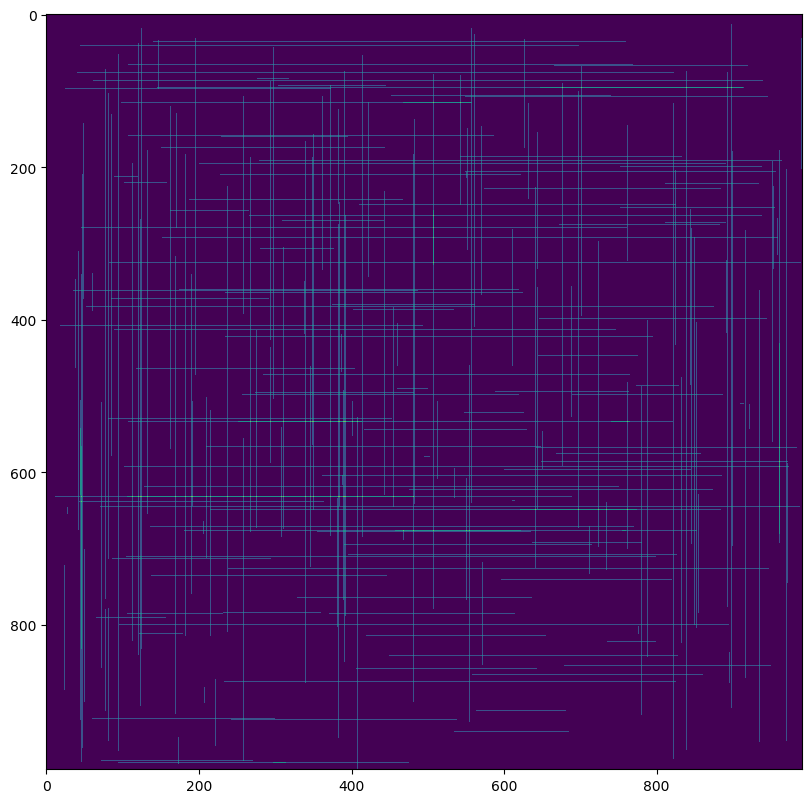


There are a total of vent 5294 intersections


In [52]:
sea_map = create_map(starts + ends)

for i, start in enumerate(starts):
    line = generate_orthogonal_line(starts[i], ends[i])
    if line:
        sea_map = map_line(line, sea_map)

import numpy as np 
import matplotlib.pyplot as plt

plt.clf()
plt.imshow(sea_map, interpolation='none')
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['figure.dpi'] = 100
plt.show()

intersections = 0
for row in sea_map:
    for col in row:
        if col > 1:
            intersections += 1

print(f"\nThere are a total of vent {intersections} intersections")

# Part 2 - Including non-orthogonal lines

In order to do part two, I should only need to redefine the `generate_orthogonal_line` function to be more general. I'll rename the function to `generate_line` and add another case in order to properly generate the new lines. Almost all of this can just be copied from Part 1

In [37]:
def generate_line(start, end):
    """
    Takes line start and end points and returns a list of coordinates for all points on the line. 
    Ignores lines which aren't orthogonal or diagnoal.
    
    Parameters:
        start [int x, int y]: The x and y location of the line start
        end [int x, int y]: The x and y location of the line end
        
    Returns: 
        points [[int x, int y], ...]: Returns a list of points the line crosses as 2 element x, y lists.
        returns None if the line is not orthogonal or diagonal
    """
    
    # start by returning for lines that aren't orthogonal or diagonal
    if start[0] != end[0] and start[1] != end[1]:
        if abs(start[0]-end[0]) != abs(start[1]-end[1]):
            return None
    
    points = []
    
    # start with vertical lines where x1 = x2
    if start[0] == end[0]:
        if start[1] > end[1]:
            for point in range(end[1], start[1]+1):
                points.append([start[0], point])
        if start[1] < end[1]:
            for point in range(start[1], end[1]+1):
                points.append([start[0], point])
        # not sure if this is needed, but if the start and end points are identical, just return that point
        if start[1] == end[1]:
            points.append[start[0], start[1]]

        return points
            
    # deal with horizontal lines where y1 = y2, no need to deal with identical points again
    if start[1] == end[1]:
        if start[0] > end[0]:
            for point in range(end[0], start[0]+1):
                points.append([point, start[1]])
        if start[0] < end[0]:
            for point in range(start[0], end[0]+1):
                points.append([point, start[1]])

        return points
                
    # at this point we know the line is diagonal. Start by deciding if each axis needs to be incremented up 
    # or down, and finding the line length
    if start[0] < end[0]:
        x_inc = 1
        length = (end[0]+1)-start[0]
    else:
        x_inc = -1
        length = (start[0]+1)-end[0]
    
    if start[1] < end[1]:
        y_inc = 1
    else:
        y_inc = -1
    
    # then just create the line, knowing the direction, length and start point
    for i in range(length):
        x = start[0] + x_inc*i
        y = start[1] + y_inc*i
        points.append([x,y])
        
    return points

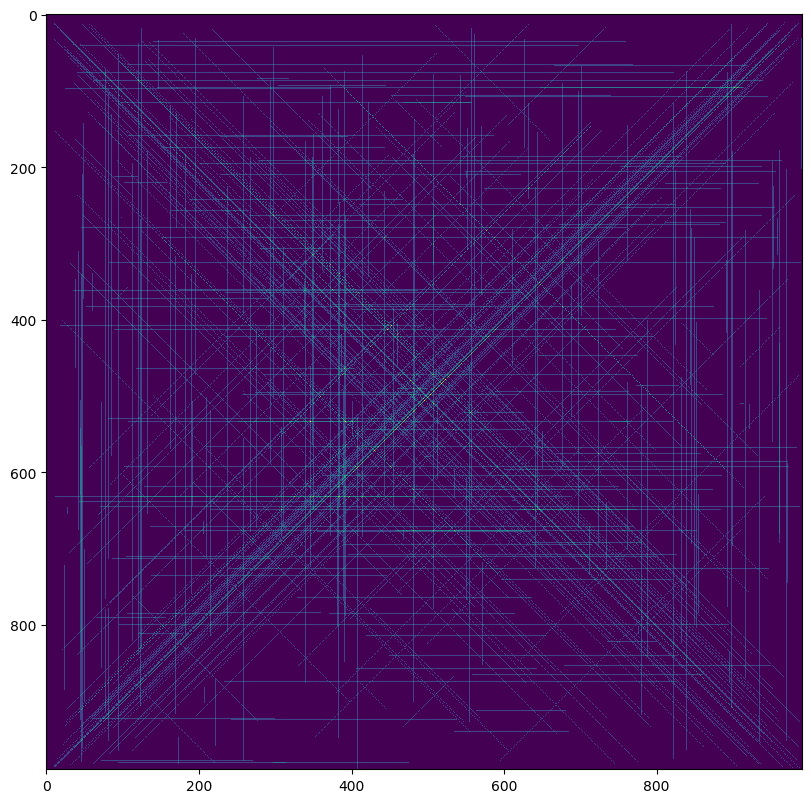


There are a total of vent 21698 intersections


In [53]:
sea_map = create_map(starts + ends)

for i, start in enumerate(starts):
    line = generate_line(starts[i], ends[i])
    if line:
        sea_map = map_line(line, sea_map)

plt.clf()
plt.imshow(sea_map, interpolation='none')
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['figure.dpi'] = 100
plt.show()

intersections = 0
for row in sea_map:
    for col in row:
        if col > 1:
            intersections += 1

print(f"\nThere are a total of vent {intersections} intersections")